# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
import random

# Constants and Helpers

In [2]:
DATA_DIR = "../data"
RAW_DATA_DIR = f"{DATA_DIR}/raw"

MIN_R = 1
MAX_R = 6

Rs = list(range(MIN_R,MAX_R+1))

In [3]:
get_lables_loc = f"{RAW_DATA_DIR}/labels_train.csv"

In [4]:
def get_r_train_set(r:int, data_dir:str=RAW_DATA_DIR):
    return f"{data_dir}/R{r}_train.csv"

# Explore labels

In [5]:
labels_df = pd.read_csv(get_lables_loc)

In [6]:
labels_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


In [7]:
label_count = len(labels_df.columns)
sample_count = len(labels_df)

print(f"Numer of labels: {label_count}")
print(f"Number of samples: {sample_count}")

Numer of labels: 19
Number of samples: 25000


In [8]:
label_percent = dict(labels_df.sum()/len(labels_df))

<Axes: title={'center': 'Probablity distribution of Individual Class occurance'}, xlabel='Class', ylabel='Probablity'>

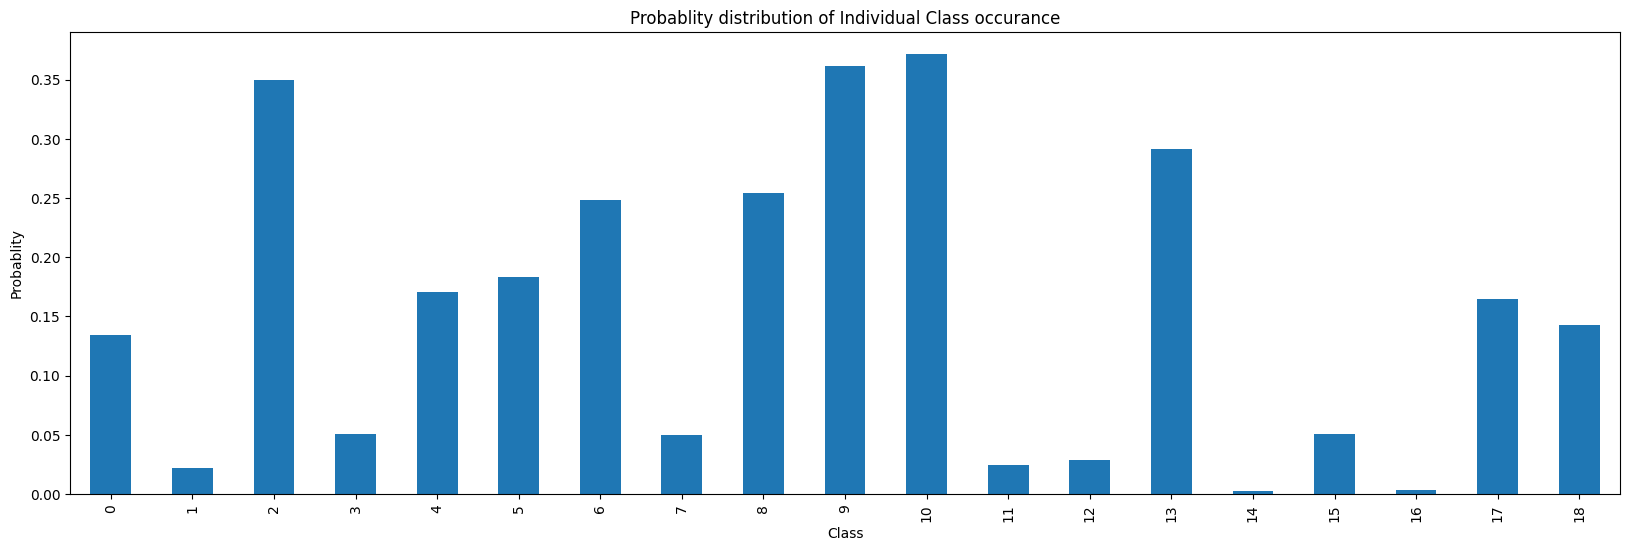

In [117]:
pd.DataFrame(index=label_percent.keys(), data=label_percent.values()).plot.bar(
    xlabel="Class",
    ylabel="Probablity",
    title="Probablity distribution of Individual Class occurance",
    legend=False,
    grid=False,
    figsize=(20,6)
)

<Axes: title={'center': 'Distribution of number of lables per observation'}, xlabel='Occurance', ylabel='Count'>

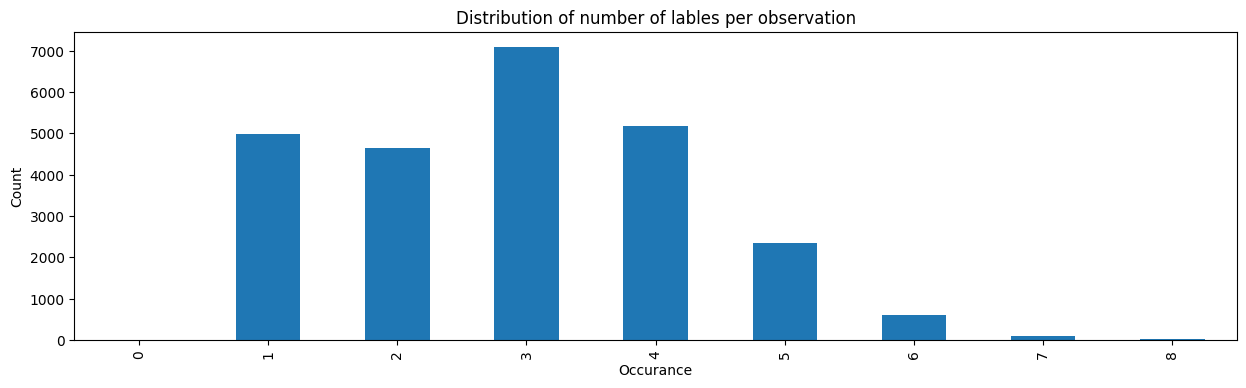

In [115]:
labels_df.sum(axis=1).value_counts().sort_index().plot.bar(
    title="Distribution of number of lables per observation",
    xlabel="Occurance",
    ylabel="Count",
    grid=False,
    figsize=(15,4)
)

# Exlore train dataset

In [11]:
r_dfs = {r:pd.read_csv(get_r_train_set(r=r)) for r in Rs}

In [12]:
len(r_dfs[1]['4'].value_counts())

1584

Train dataset1: 
	Feature count: 768 
	Sample Count: 25000
Train dataset2: 
	Feature count: 768 
	Sample Count: 25000
Train dataset3: 
	Feature count: 768 
	Sample Count: 25000
Train dataset4: 
	Feature count: 1024 
	Sample Count: 25000
Train dataset5: 
	Feature count: 1024 
	Sample Count: 25000
Train dataset6: 
	Feature count: 1024 
	Sample Count: 25000


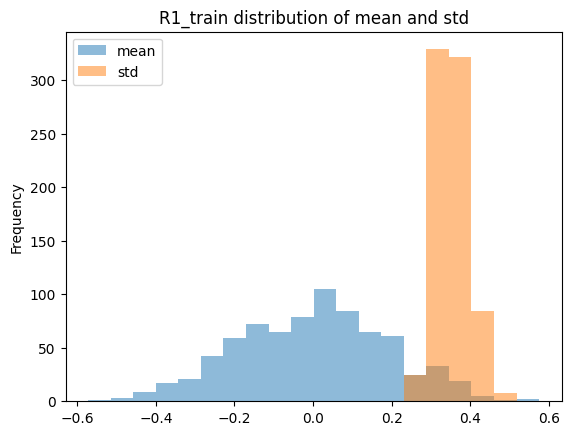

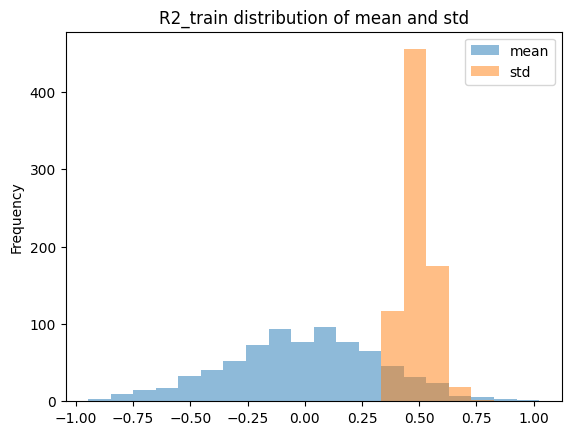

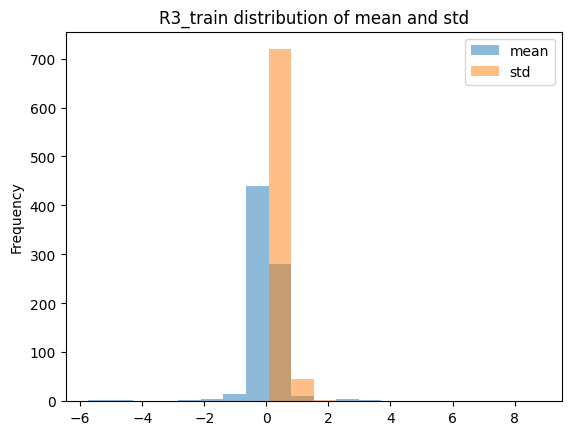

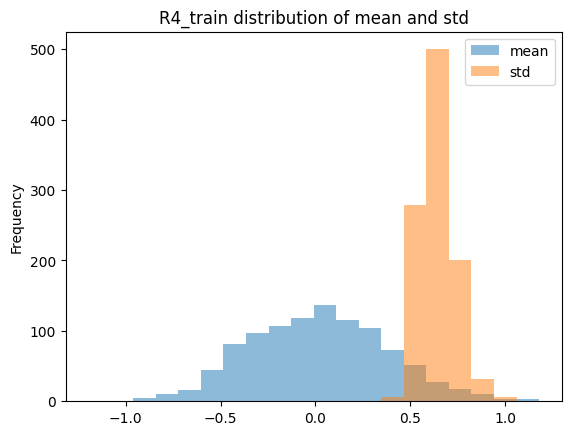

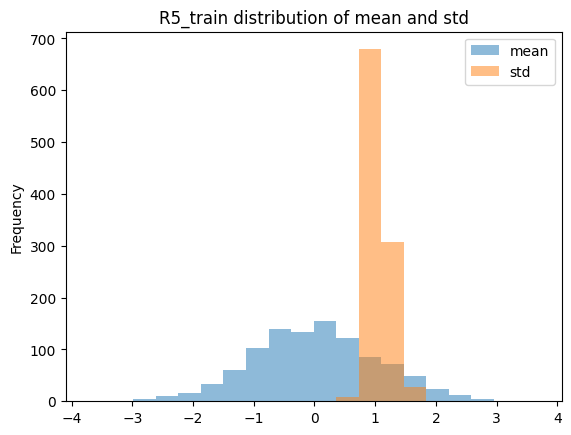

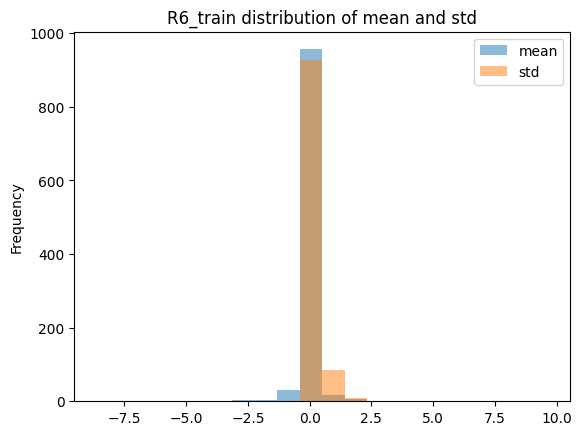

In [13]:
train_dataset_desc = {}

for r in Rs:
    df = r_dfs[r]
    r_feature_count = len(df.columns)
    r_sample_count = len(df)

    train_dataset_desc[r] = {
        "feature_count": r_feature_count,
        "sample_count": r_sample_count,
        "distribution": {
            "mean": df.mean().to_list(),
            "std": df.std().to_list()
        }
    }

for r in train_dataset_desc:
    print(f"Train dataset{r}: \n\tFeature count: {train_dataset_desc[r]['feature_count']} \n\tSample Count: {train_dataset_desc[r]['sample_count']}")
    mean = train_dataset_desc[r]['distribution']['mean']
    std = train_dataset_desc[r]['distribution']['std']
    pd.DataFrame({
        'mean': mean,
        'std': std
    }).plot.hist(bins=20, alpha=0.5, title=f"R{r}_train distribution of mean and std")

In [14]:
pb_corrs = {}

for label in labels_df.columns:
    binary_variable = labels_df[label].values
    for r in train_dataset_desc:
        for feature in range(train_dataset_desc[r]['feature_count']):
            feature = f"{feature}"
            continuous_variable = r_dfs[r][feature].values
            pb_corr, p_value = pointbiserialr(binary_variable, continuous_variable)
            pb_corrs[(r,label,feature)] = pb_corr


In [15]:
pb_corrs_df = pd.DataFrame(index=pb_corrs.keys(), data=pb_corrs.values())
pb_corrs_df.index.names = ["r","label","feature"]

In [16]:
max_pb_corr_df = pd.DataFrame({
    r:[pb_corrs_df.loc[r,label].apply(lambda val: abs(val)).max()[0] for label in labels_df.columns]
    for r in Rs
},
index = labels_df.columns
)

max_pb_corr_df

/tmp/ipykernel_3314778/1900165535.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  r:[pb_corrs_df.loc[r,label].apply(lambda val: abs(val)).max()[0] for label in labels_df.columns]


,1,2,3,4,5,6
0,0.335796,0.339524,0.301132,0.401151,0.360832,0.290996
1,0.193425,0.207804,0.135693,0.200444,0.245494,0.145436
2,0.507479,0.449267,0.441746,0.469021,0.473401,0.471857
3,0.184959,0.242114,0.274825,0.230250,0.214876,0.275898
4,0.395716,0.402375,0.415531,0.354953,0.409700,0.392758
5,0.308308,0.366413,0.321784,0.363603,0.408348,0.319885
6,0.304609,0.337185,0.271327,0.307468,0.337549,0.265017
7,0.317164,0.333398,0.432147,0.353079,0.426679,0.449833
8,0.316806,0.370136,0.328853,0.398241,0.386037,0.347052
9,0.482678,0.488863,0.553287,0.554377,0.529937,0.537178


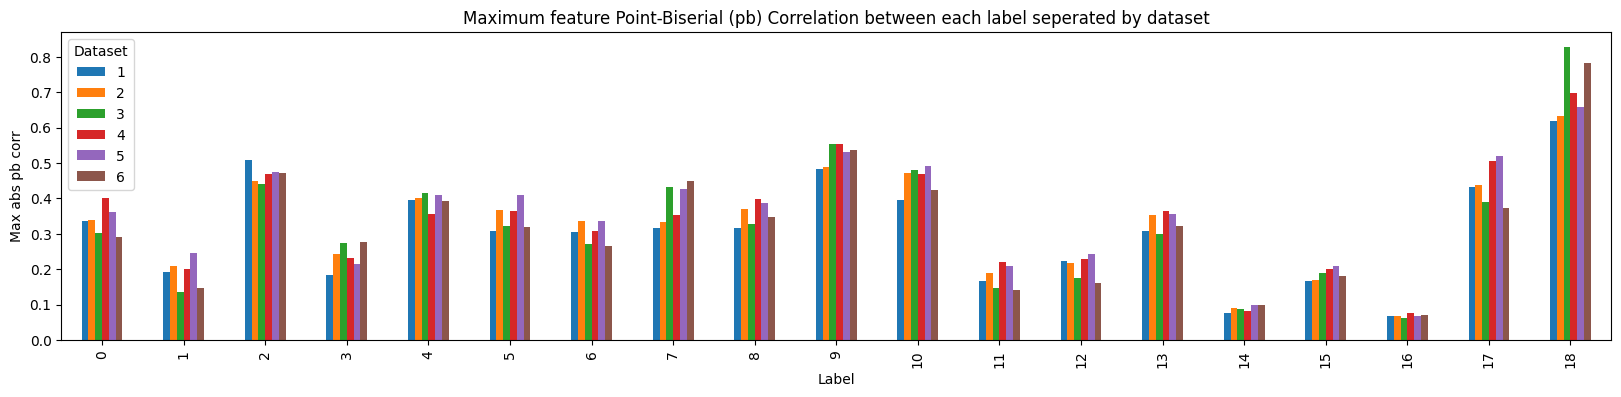

In [121]:
ax = max_pb_corr_df.plot.bar(
    figsize=(20,4),
    xlabel="Label",
    ylabel="Max abs pb corr",
    title="Maximum feature Point-Biserial (pb) Correlation between each label seperated by dataset"
)
ax.legend(title="Dataset")

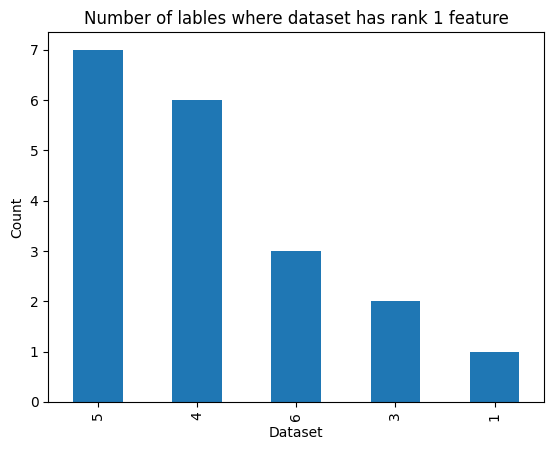

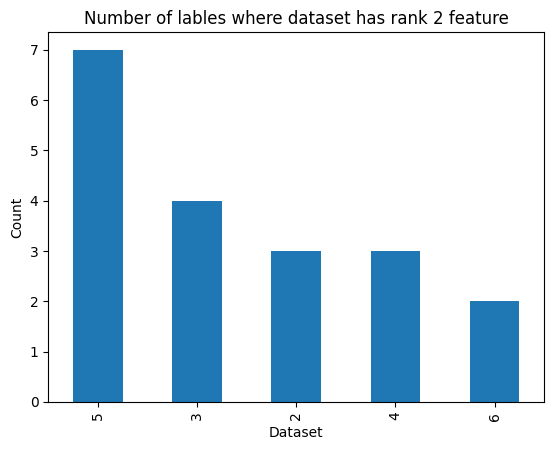

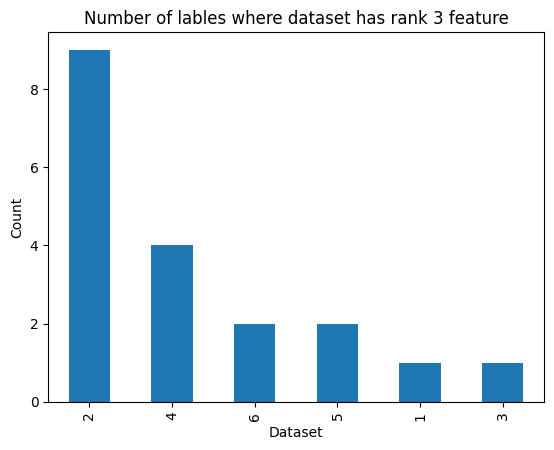

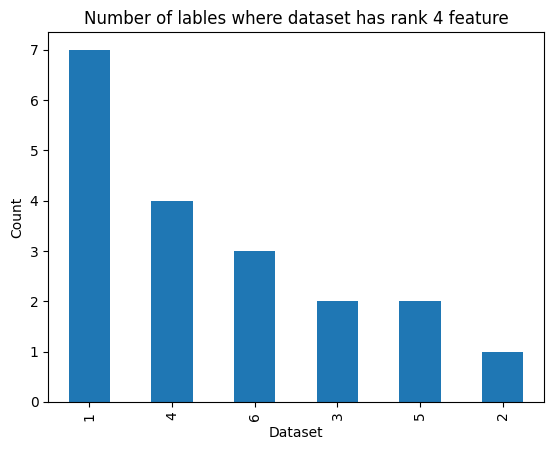

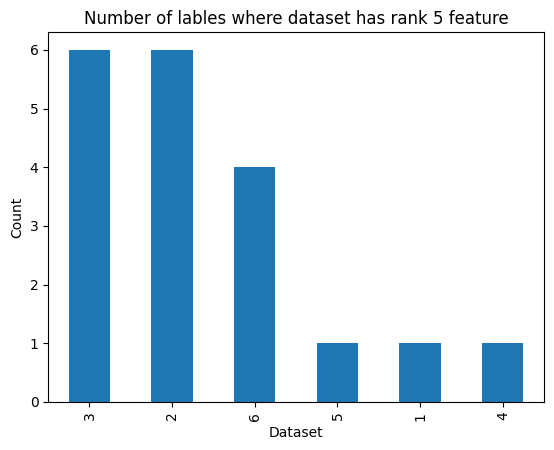

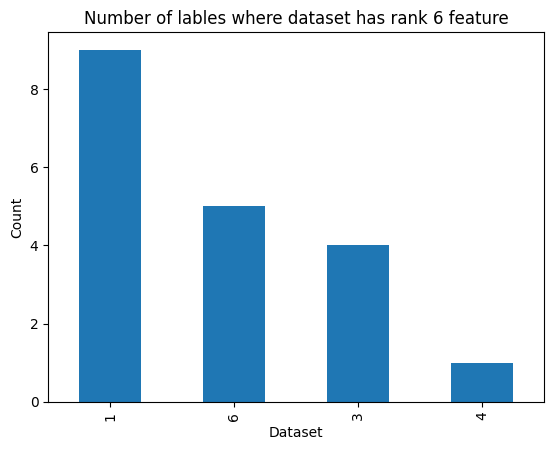

In [127]:
label_rank_df = pd.DataFrame()
for label in labels_df.columns:
    label_rank_df[label] = max_pb_corr_df.T.sort_values(by=label, ascending=False).index.values

for rank in range(6):
    label_rank_df.T[rank].value_counts().plot(
        kind="bar",
        title=f"Number of lables where dataset has rank {rank+1} feature",
        xlabel="Dataset",
        ylabel="Count"
        )
    plt.show()

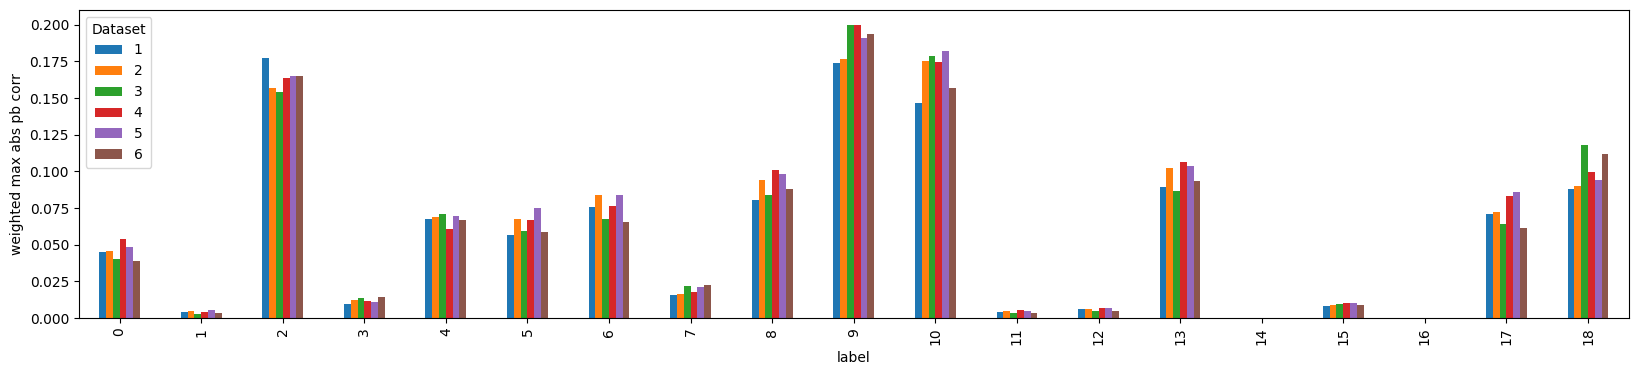

In [19]:
weighted_max_pb_corr_df = (max_pb_corr_df.T*label_percent).T
ax = weighted_max_pb_corr_df.plot.bar(
    figsize=(20,4),
    xlabel="Label",
    ylabel="Weighted max abs pb corr"
)
ax.legend(title="Dataset")

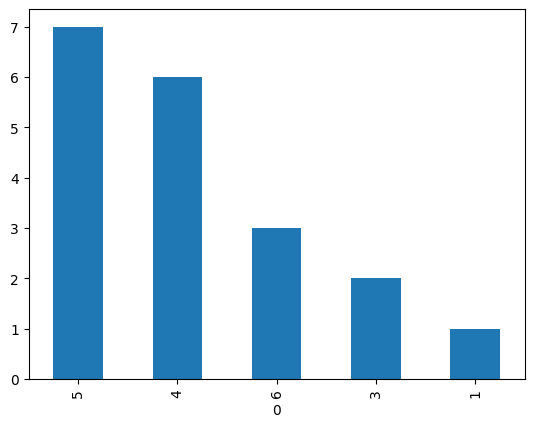

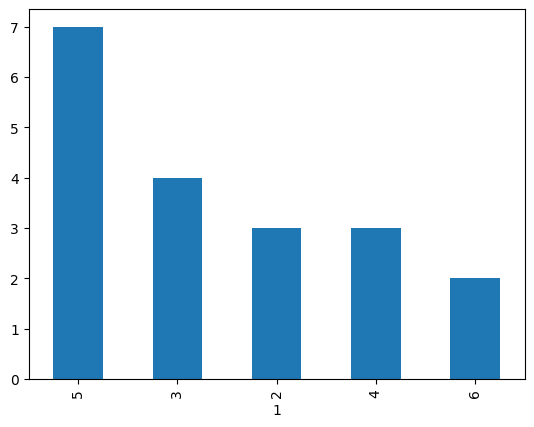

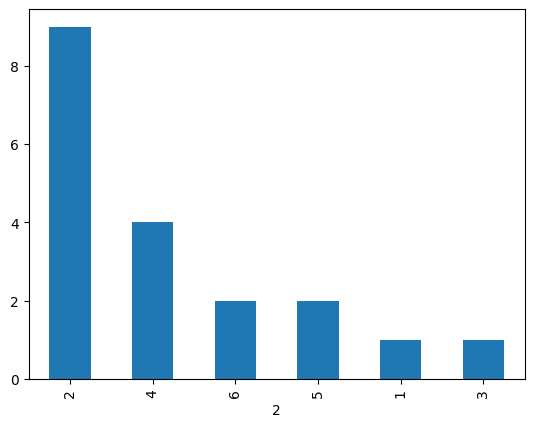

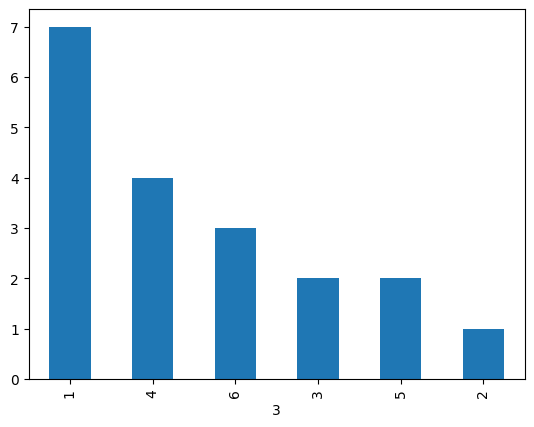

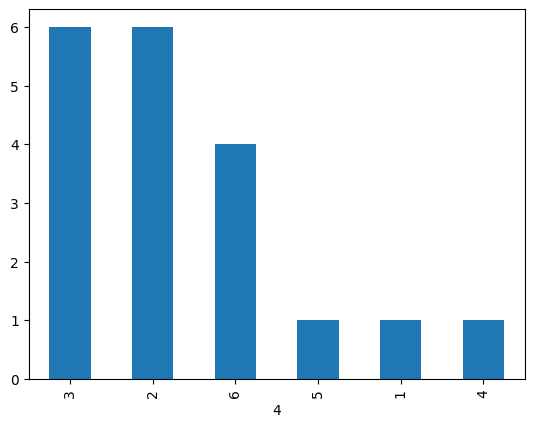

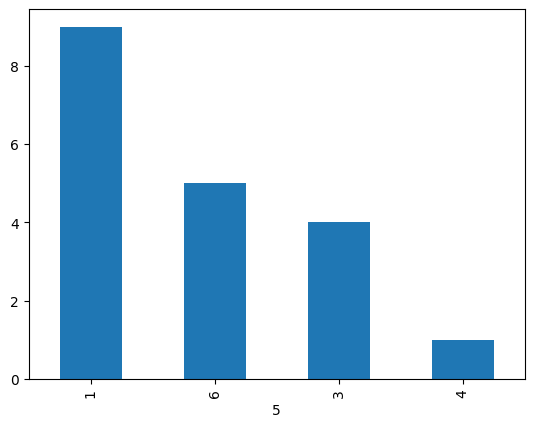

In [20]:
label_rank_df = pd.DataFrame()
for label in labels_df.columns:
    label_rank_df[label] = weighted_max_pb_corr_df.T.sort_values(by=label, ascending=False).index.values

for rank in range(6):
    label_rank_df.T[rank].value_counts().plot(stacked=True,kind="bar")
    plt.show()

In [21]:
for r in Rs:
    print(f"R: {r}")
    for label in labels_df.columns:
        x = pb_corrs_df.loc[r,label].apply(lambda val: abs(val)).max() 
        print(f"\t label-{label:2}: {x[0]:.6}")

R: 1
	 label-0 : 0.335796
	 label-1 : 0.193425
	 label-2 : 0.507479
	 label-3 : 0.184959
	 label-4 : 0.395716
	 label-5 : 0.308308
	 label-6 : 0.304609
	 label-7 : 0.317164
	 label-8 : 0.316806
	 label-9 : 0.482678
	 label-10: 0.395132
	 label-11: 0.165652
	 label-12: 0.224523
	 label-13: 0.3072
	 label-14: 0.0760479
	 label-15: 0.167389
	 label-16: 0.0686877
	 label-17: 0.431388
	 label-18: 0.617362
R: 2
	 label-0 : 0.339524
	 label-1 : 0.207804
	 label-2 : 0.449267
	 label-3 : 0.242114
	 label-4 : 0.402375
	 label-5 : 0.366413
	 label-6 : 0.337185
	 label-7 : 0.333398
	 label-8 : 0.370136
	 label-9 : 0.488863
	 label-10: 0.471587
	 label-11: 0.188694
	 label-12: 0.217379
	 label-13: 0.352321
	 label-14: 0.0907787
	 label-15: 0.170523
	 label-16: 0.0682576
	 label-17: 0.438397
	 label-18: 0.632652
R: 3
	 label-0 : 0.301132
	 label-1 : 0.135693
	 label-2 : 0.441746
	 label-3 : 0.274825
	 label-4 : 0.415531
	 label-5 : 0.321784
	 label-6 : 0.271327
	 label-7 : 0.432147
	 label-8 : 0.328

/tmp/ipykernel_3314778/2318027864.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  x = pb_corrs_df.loc[r,label].apply(lambda val: abs(val)).max()


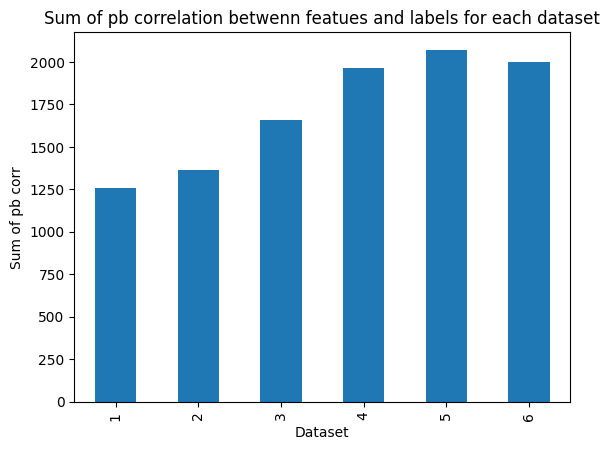

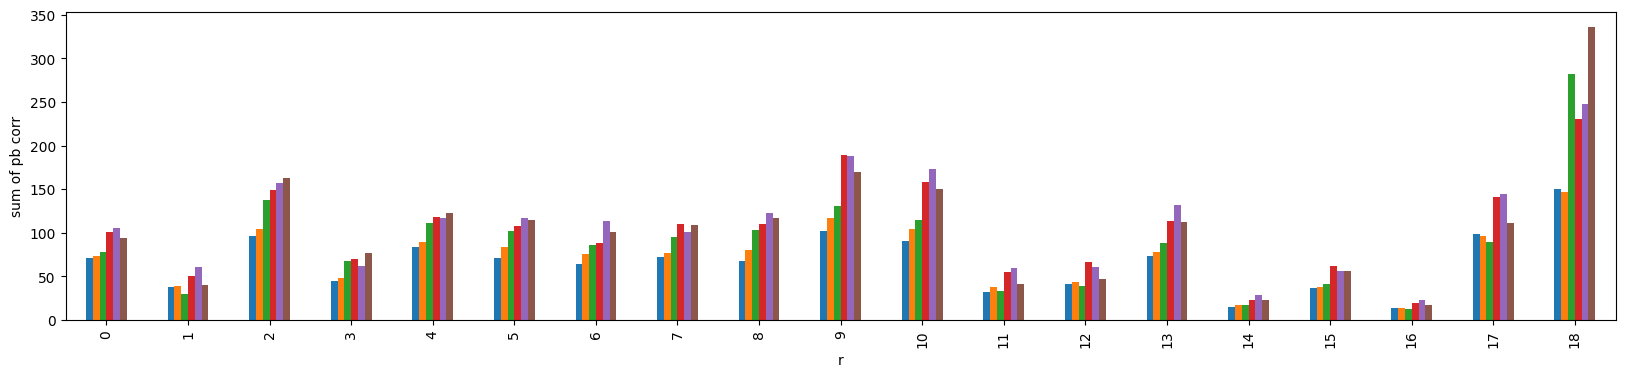

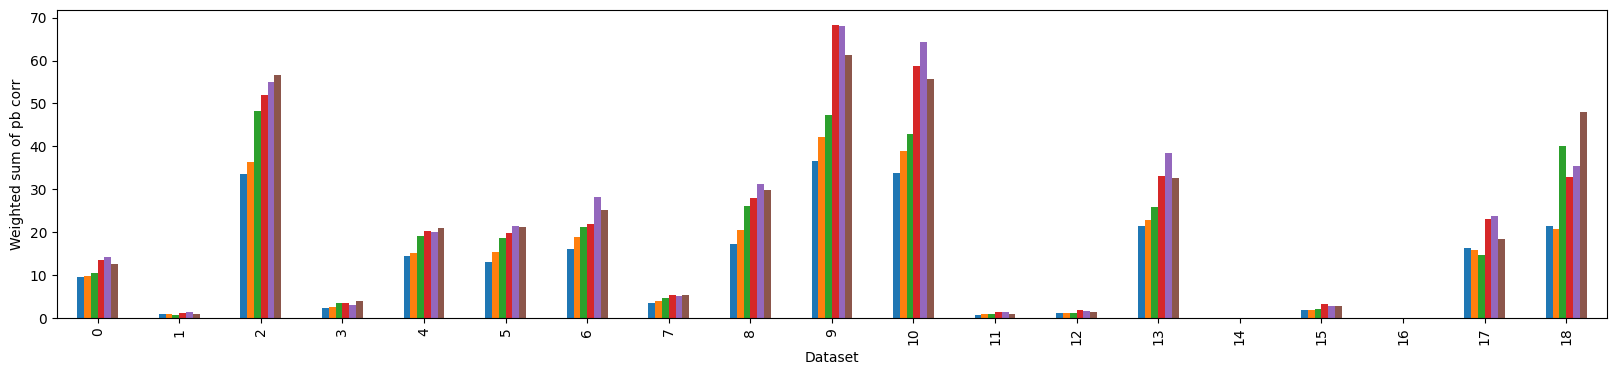

In [149]:
pb_corrs_df.abs().reset_index()[['r',0]].groupby('r').sum().plot.bar(
    legend=False,
    title="Sum of pb correlation betwenn featues and labels for each dataset",
    ylabel="Sum of pb corr",
    xlabel="Dataset")


sum_pb_corr_l_r_df = pb_corrs_df.abs().reset_index()[['r','label',0]].groupby(['label','r']).sum().unstack()
sum_pb_corr_l_r_df.index = [int(i) for i in sum_pb_corr_l_r_df.index.values]
sum_pb_corr_l_r_df.sort_index().plot.bar(
    figsize=(20,4),
    stacked=False,
    legend=False,
    ylabel="sum of pb corr",
    xlabel="r")

sum_pb_corr_l_r_df.index = [str(i) for i in sum_pb_corr_l_r_df.index.values]
weighted_sum_pb_corr_l_r_df = (sum_pb_corr_l_r_df.T*label_percent).T
weighted_sum_pb_corr_l_r_df.index = [int(i) for i in sum_pb_corr_l_r_df.index.values]
weighted_sum_pb_corr_l_r_df.sort_index().plot.bar(
    figsize=(20,4),
    stacked=False,
    legend=False,
    ylabel="Weighted sum of pb corr",
    xlabel="Dataset")
weighted_sum_pb_corr_l_r_df.index = [str(i) for i in sum_pb_corr_l_r_df.index.values]

# sum_pb_corr_l_r_df

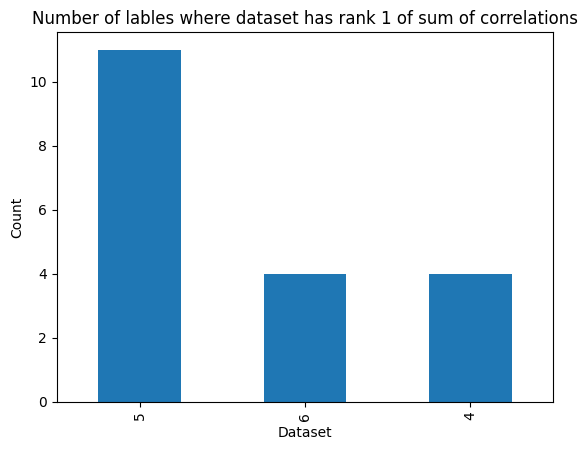

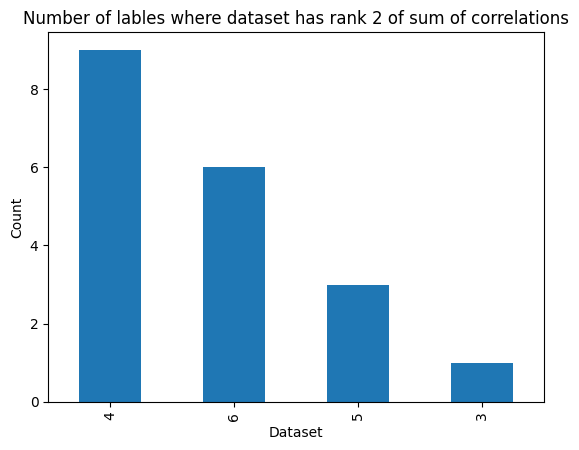

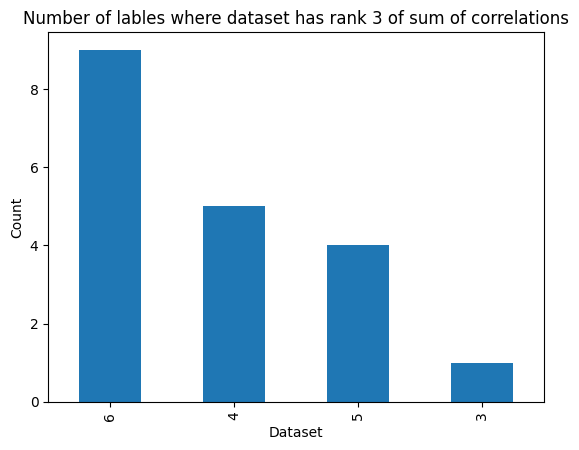

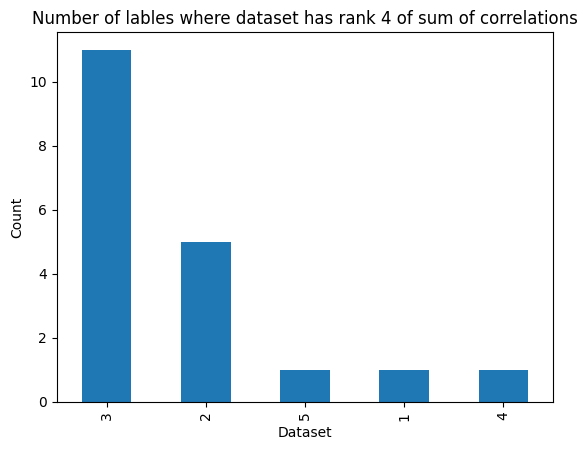

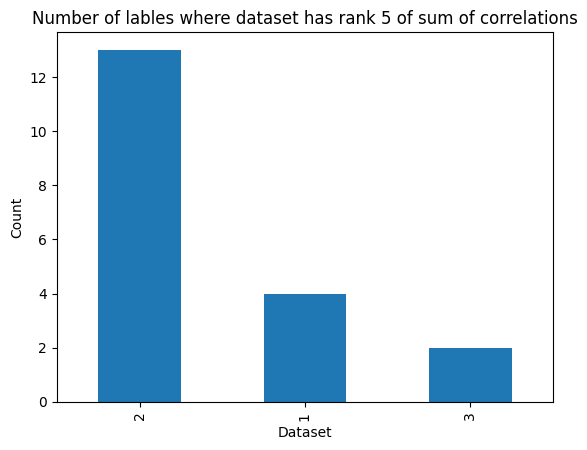

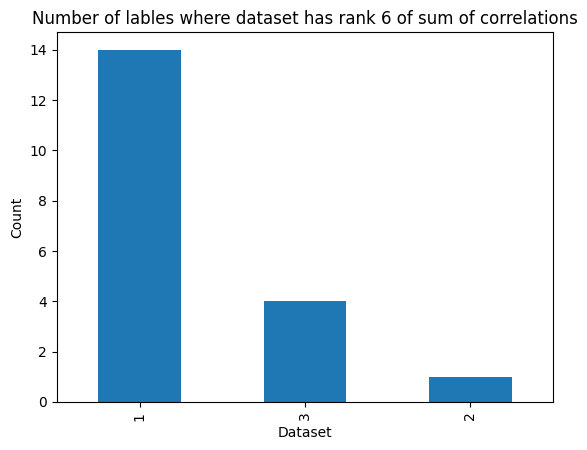

In [147]:
label_rank_df = pd.DataFrame()
for label in labels_df.columns:
    label_rank_df[label] = sum_pb_corr_l_r_df[0].T.sort_values(by=label, ascending=False).index.values

for rank in range(6):
    label_rank_df.T[rank].value_counts().plot.bar(
        title=f"Number of lables where dataset has rank {rank+1} of sum of correlations",
        xlabel="Dataset",
        ylabel="Count"
    )
    plt.show()

# sum_pb_corr_l_r_df[0].T

In [14]:
total_features = sum([train_dataset_desc[r]["feature_count"] for r in train_dataset_desc])
print(f"Total Features: {total_features}")

Total Features: 5376


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[18]


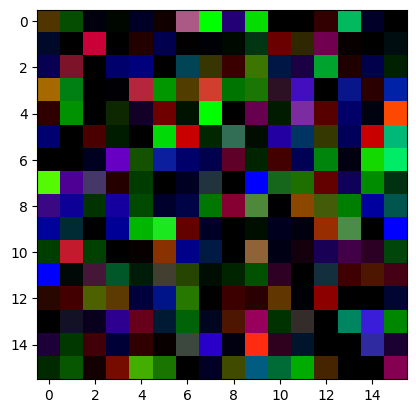

In [78]:
r_index = Rs[0] 
sample_index = random.randint(a=0,b=train_dataset_desc[r_index]["sample_count"])


binary_list = labels_df.iloc[sample_index].to_list()
indices_of_ones = [index for index, value in enumerate(binary_list) if value == 1]
print(indices_of_ones)

# Example 1D vector representing pixel values of a grayscale image
vector = r_dfs[r_index].iloc[sample_index].values

# Assuming the image has 3 rows and 3 columns
num_rows = (2**4)
num_cols = (2**4)
channels = 3

# Reshape the vector to a 2D array (matrix) representing the image
image_matrix = vector.reshape((num_rows, num_cols,channels))

# Display the image using matplotlib
plt.imshow(image_matrix[:,:,:],)
plt.show()

In [17]:
# image_matrix[:,:,:1]

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class MyCNNModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(MyCNNModel, self).__init__()
        self.conv1 = nn.Conv1d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * (input_size // 4), 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        # x = x.view(-1, 1, x.size(1))  # Reshape to (batch_size, channels, input_size)
        x = F.relu(self.conv1(x))
        x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 64 * (x.size(2) // 4))  # Reshape for fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return torch.sigmoid(x)  # Sigmoid activation for multi-label classification

# Instantiate the model
model = MyCNNModel(768, 16)

# Print the model architecture
print(model)

MyCNNModel(
  (conv1): Conv1d(1, 32, kernel_size=(3,), stride=(1,), padding=(1,))
  (conv2): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
  (pool): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=12288, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=16, bias=True)
)


In [19]:
conv1 = nn.Conv1d(3, 32, kernel_size=3, padding=1)
conv2 = nn.Conv1d(32, 64, kernel_size=3, padding=1)

In [20]:
768/3

256.0

In [21]:
x = torch.randn(3, 256)
x.shape

torch.Size([3, 256])

In [22]:
conv2(conv1(x)).shape

torch.Size([64, 256])

In [23]:
torch.from_numpy(r_dfs[1].iloc[0].values).unsqueeze(0).shape

torch.Size([1, 768])

In [24]:
# image_tensor = torch.from_numpy(image_matrix).float().unsqueeze(0)
# model(torch.randn(1, 768))

<Axes: >

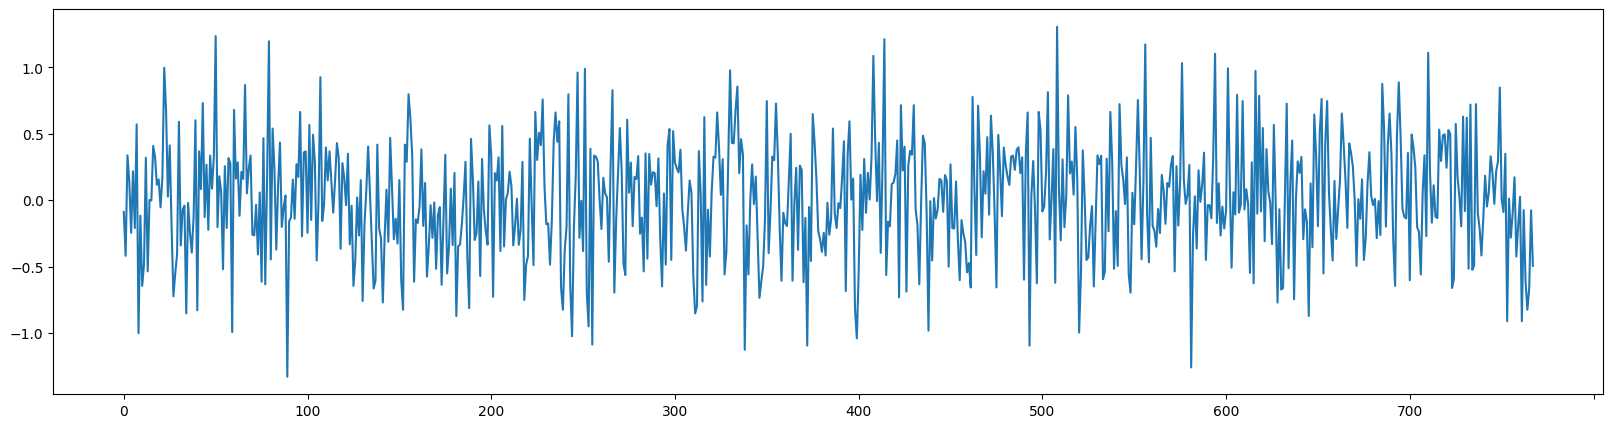

In [25]:
r_dfs[1].iloc[7].plot(figsize=(20,5))